# Stock market analysis
## part 2. Technical indicators : moving averages

<div style="text-align: right"> <b>Author : Kwang Myung Yu</b></div> 

<div style="text-align: right"> Initial upload: 2020.08.24 </div> 
<div style="text-align: right"> Last update: 2020.08.24</div> 

- 참고자료 1 : https://towardsdatascience.com/trading-toolbox-01-sma-7b8e16bd9388
- 참고자료 2 : https://www.kaggle.com/kashnitsky/topic-9-part-1-time-series-analysis-in-python  
- 참고자료 3 : https://github.com/sguys99/Hands-on-timeseries-analysis/blob/master/5.%20Simple%20time%20series%20forecasting%20models.ipynb
- 참고자료 4 : https://github.com/sguys99/Hands-on-timeseries-analysis/blob/master/Exercise1%20-%20Korean%20stock%20market%20analysis/1.%20Three%20ways%20to%20import%20stock%20data.md

본장에서는 주식 분석에 사용되는 대표적인 기술지표인 이동평균(moving average)에 대하여 살펴본다.  
1장의 기준에 따르면 이동평균은 **오버레이(Overlays), 그리고 후행지표(Lagging indicator)**에 속한다.  
주가와 같은 시계열 데이터를 예측할 때 가장 원시적인(naive) 방법은 다음 스텝의 값이 현재 값과 같을 것으로 추정하는 것이다.  
이동평균은 이 접근법의 단점을 보완하기 위해 이전 스텝들의 값의 평균을 계산하여 예측에 사용한다.  
이동평균은 주식이나 금융 데이터처럼 노이즈가 큰 데이터의 패턴이나 trend를 파악하는데 유용하다.

## 1. 데이터 가져오기

라이브러리 import
- 주식 일별 데이터를 가져오기 위해 `FinanceDataReader` 라이브러리를 사용한다.[[참고자료]](https://github.com/FinanceData/FinanceDataReader/blob/master/tutorial/FinanceDataReader%20Tutorial%20-%20%EC%97%AC%EB%9F%AC%20%EC%A2%85%EB%AA%A9%EC%9D%98%20%EA%B0%80%EA%B2%A9%EC%9D%84%20%ED%95%9C%EB%B2%88%EC%97%90.ipynb)  
- Yahoo finance를 사용하는 방법도 있으나 국내 주식 데이터 값이 부정확하다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import datetime
import warnings; warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

import FinanceDataReader as fdr

인바디(041830) 데이터를 가져온다.

In [2]:
stock = fdr.DataReader('041830', '2018-1-01', '2020-8-22')

데이터 확인

In [3]:
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,40350,40500,39350,40100,184639,0.000000
2018-01-03,40100,40100,38450,38750,208989,-0.033666
2018-01-04,38450,38900,36950,37450,199827,-0.033548
2018-01-05,37450,38250,36850,38200,165516,0.020027
2018-01-08,38200,39950,37550,39950,277422,0.045812


In [4]:
stock.shape

(650, 6)

In [5]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 650 entries, 2018-01-02 to 2020-08-21
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    650 non-null    int64  
 1   High    650 non-null    int64  
 2   Low     650 non-null    int64  
 3   Close   650 non-null    int64  
 4   Volume  650 non-null    int64  
 5   Change  650 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 35.5 KB


차트 그려보기

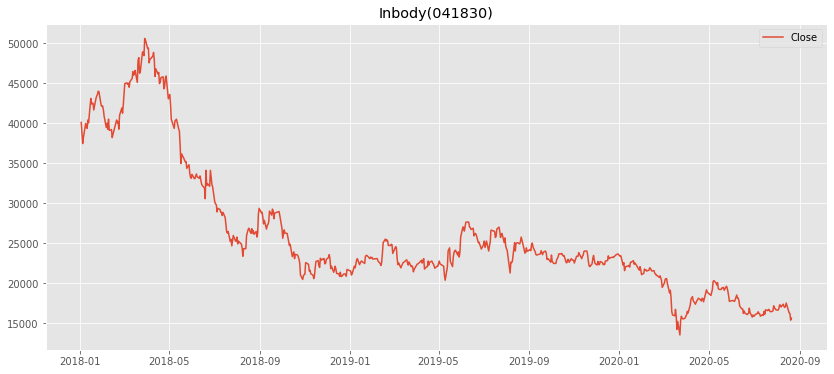

In [6]:
plt.figure(figsize=(14, 6))
plt.plot(stock.index, stock['Close'], label = 'Close')
plt.title('Inbody(041830)')
plt.legend()
plt.show()

## 2. 이동평균 계산하기

이동평균 계산법에는 다음의 세가지가 있다.  
- Simple moving average : 설정된 구간(window, k)에서 값의 평균을 계산($\hat{y}_{t} = \frac{1}{k} \displaystyle\sum^{k}_{n=1} y_{t-n}$)  
- Weighted moving average : 평균을 구할 때 샘플마다 가중치를 다르게 계산($\hat{y}_{t} = \displaystyle\sum^{k}_{n=1} \omega_n y_{t-n}$ , 여기서 $\displaystyle\sum^{k}_{n=1}\omega_n=1$)  
- Exponential moving average : 가중치가 exponential하게 감소 ($\hat{y}_{t} = \alpha \cdot y_t + (1-\alpha) \cdot \hat y_{t-1} $)

### 2.1 이동평균 계산방법 비교

Simple moving average

In [7]:
stock['5SMA'] = stock['Close'].rolling(window = 5).mean()

Weighted moving average

In [8]:
weights = np.array([0.4, 0.3, 0.15, 0.1, 0.5])
sum_weights = np.sum(weights)
stock['5WMA'] = stock['Close'].rolling(window = 5).apply(lambda x: np.sum(weights*x)/sum_weights, raw = False)

Exponential moving average

In [9]:
stock['5EMA'] = stock['Close'].ewm(span=5).mean()

결과 비교 : 시각화

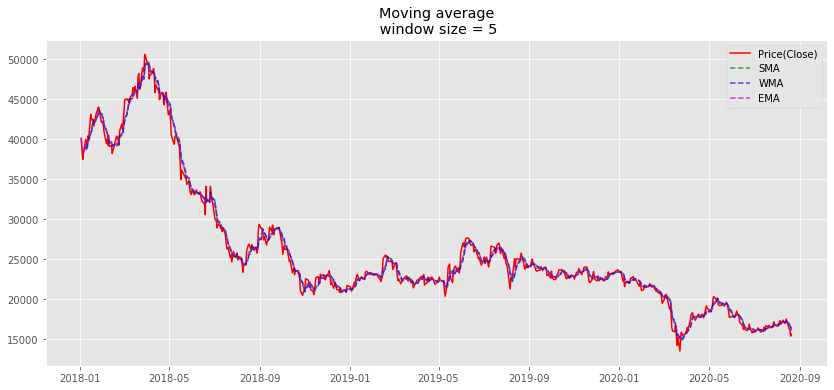

In [10]:
window = 5
plt.figure(figsize = (14, 6))
plt.plot(stock['Close'], 'r', label = 'Price(Close)')
plt.plot(stock['5SMA'], 'g--', alpha = 0.7, label = 'SMA')
plt.plot(stock['5WMA'], 'b--', alpha = 0.7, label = 'WMA')
plt.plot(stock['5EMA'], 'm--', alpha = 0.7, label = 'EMA')
plt.title("Moving average\n window size = {}".format(window))
plt.legend()

구간을 줄여서 다시 비교

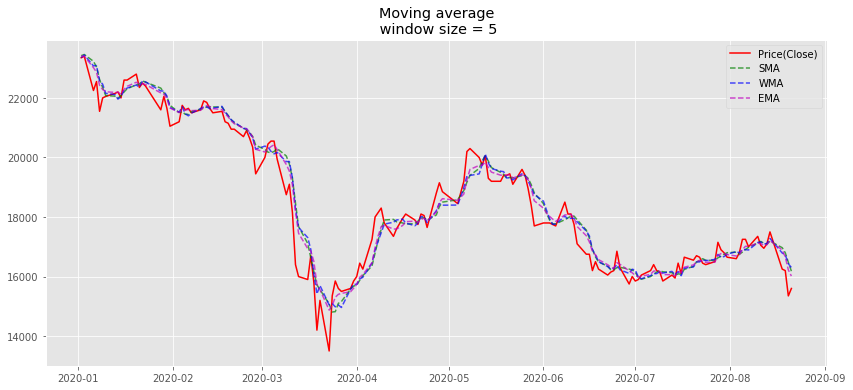

In [11]:
stock2020 = stock['2020':]
plt.figure(figsize = (14, 6))
plt.plot(stock2020['Close'], 'r', label = 'Price(Close)')
plt.plot(stock2020['5SMA'], 'g--', alpha = 0.7, label = 'SMA')
plt.plot(stock2020['5WMA'], 'b--', alpha = 0.7, label = 'WMA')
plt.plot(stock2020['5EMA'], 'm--', alpha = 0.7, label = 'EMA')
plt.title("Moving average\n window size = {}".format(window))
plt.legend()

구간 더 줄여서 비교 : 최근 3개월

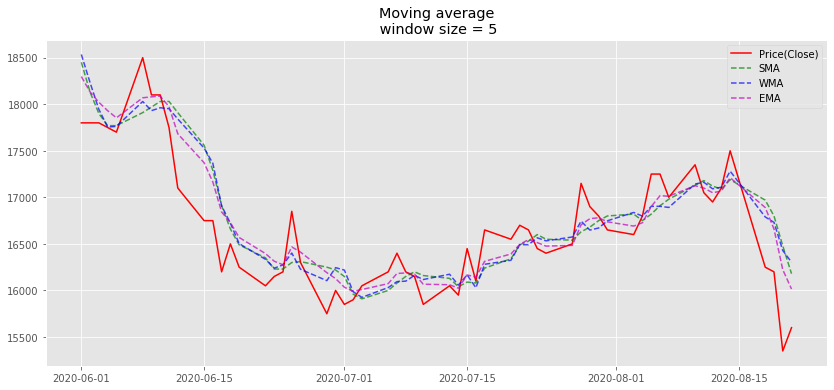

In [12]:
stock_3m = stock['2020-06':]
plt.figure(figsize = (14, 6))
plt.plot(stock_3m['Close'], 'r', label = 'Price(Close)')
plt.plot(stock_3m['5SMA'], 'g--', alpha = 0.7, label = 'SMA')
plt.plot(stock_3m['5WMA'], 'b--', alpha = 0.7, label = 'WMA')
plt.plot(stock_3m['5EMA'], 'm--', alpha = 0.7, label = 'EMA')
plt.title("Moving average\n window size = {}".format(window))
plt.legend()

- 전체적으로 EMA, WMA가 급변하는 가격추이를 잘 반영한다.

### 2.2 이동평균 구간의 길이에 따른 비교  
- 국내 주식의 기술적 분석에는 5일, 20일, 60일, 120일 평균이 주로 사용된다.  
  (해외에서는 20, 50, 100일 평균이 자주 사용됨)
- pandas의 rolling 메서드에서 window 값 설정으로 원하는 길이의 이동평균을 계산할 수 있다.  
- window 값을 달리 했을 때 나타나는 특징에 대하여 살펴본다.

앞에서 계산했던 결과 삭제

In [13]:
stock = stock.drop(labels = ['5SMA', '5WMA', '5EMA'], axis = 1)

In [14]:
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,40350,40500,39350,40100,184639,0.000000
2018-01-03,40100,40100,38450,38750,208989,-0.033666
2018-01-04,38450,38900,36950,37450,199827,-0.033548
2018-01-05,37450,38250,36850,38200,165516,0.020027
2018-01-08,38200,39950,37550,39950,277422,0.045812


5일, 20일, 60일 평균 계산하기

In [15]:
stock['5MA'] = stock['Close'].rolling(window = 5).mean()
stock['20MA'] = stock['Close'].rolling(window = 20).mean()
stock['60MA'] = stock['Close'].rolling(window = 60).mean()

결과 확인하기 : 시각화

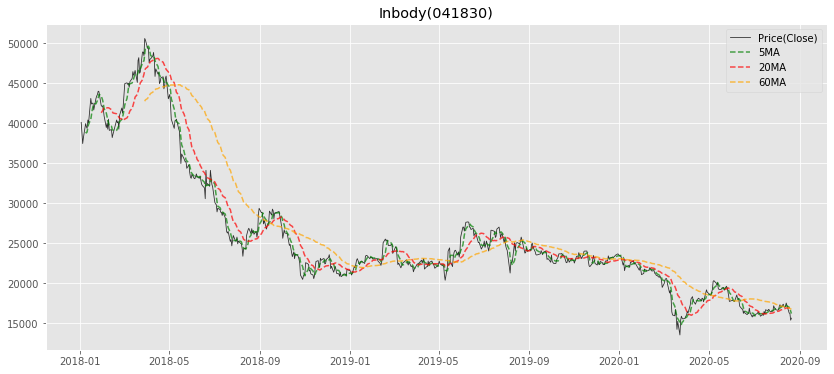

In [16]:
plt.figure(figsize = (14, 6))
plt.plot(stock['Close'], 'k', alpha = 0.8, linewidth = 0.8, label = 'Price(Close)')
plt.plot(stock['5MA'], 'g--', alpha = 0.7, label = '5MA')
plt.plot(stock['20MA'], 'r--', alpha = 0.7, label = '20MA')
plt.plot(stock['60MA'], color = 'orange', linestyle = '--', alpha = 0.7, label = '60MA')
plt.title('Inbody(041830)')
plt.legend()

거래량을 포함하여 시각화 하기

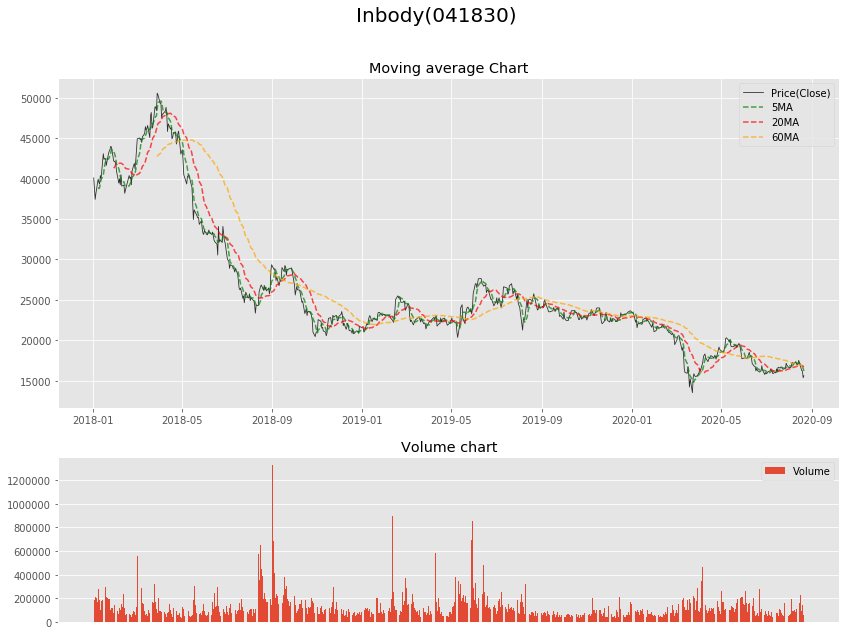

In [17]:
# gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

fig, axes = plt.subplots(nrows=2, ncols=1,
                        gridspec_kw={'height_ratios': [2, 1]},figsize=(14, 10))  
axes[0].plot(stock['Close'], 'k', alpha = 0.8, linewidth = 0.8, label = 'Price(Close)')
axes[0].plot(stock['5MA'], 'g--', alpha = 0.7, label = '5MA')
axes[0].plot(stock['20MA'], 'r--', alpha = 0.7, label = '20MA')
axes[0].plot(stock['60MA'], color = 'orange', linestyle = '--', alpha = 0.7, label = '60MA')
axes[0].legend()

x = np.arange(len(stock.index)) # 바차트를 위해서 x 축 추가
axes[1].get_xaxis().set_visible(False)
axes[1].bar(x, stock['Volume'], label = 'Volume')
axes[1].legend()

fig.suptitle('Inbody(041830)', size=20)
plt.setp(axes[0], title='Moving average Chart')
plt.setp(axes[1], title='Volume chart')

plt.show()

- window가 클수록 smoothing effect가 커진다.  
- window가 클수록 trend에 대한 lagging effect가 커진다.  
- 다양한 window size로 계산된 이동평균으로 주가의 지지선, 저항선을 파악할 수 있다. 그리고 이를 통해 매수, 매도 시점을 판단하는데 도움을 얻을 수 있다.

### 2.3 지금까지의 결과를 함수로 만들기

**이동평균 계산함수**

In [18]:
def calc_ma(df, numbers = 3, min_periods = None):
    windows = [5, 20, 60, 120]
    cols = ['5MA', '20MA', '60MA', '120MA']
    
    for i in range(0, numbers) :
        df[cols[i]] = df['Close'].rolling(window = windows[i], min_periods = min_periods).mean()
    
    return df

In [19]:
# 시험하기
stock = stock[['Open', 'High', 'Low', 'Close', 'Volume']]
stock = calc_ma(stock, 4)
stock.head(30)

,Open,High,Low,Close,Volume,5MA,20MA,60MA,120MA
Date,,,,,,,,,
2018-01-02,40350,40500,39350,40100,184639,NaN,NaN,NaN,NaN
2018-01-03,40100,40100,38450,38750,208989,NaN,NaN,NaN,NaN
2018-01-04,38450,38900,36950,37450,199827,NaN,NaN,NaN,NaN
2018-01-05,37450,38250,36850,38200,165516,NaN,NaN,NaN,NaN
2018-01-08,38200,39950,37550,39950,277422,38890.0,NaN,NaN,NaN
2018-01-09,40000,40100,38800,39550,184560,38780.0,NaN,NaN,NaN
2018-01-10,39550,39700,38850,39350,96820,38900.0,NaN,NaN,NaN
2018-01-11,39350,40400,39350,40400,177864,39490.0,NaN,NaN,NaN
2018-01-12,40650,40750,38950,40050,181697,39860.0,NaN,NaN,NaN


**시각화 함수**

In [20]:
def plot_stock(df, plot_ma = True, num_of_MAs = 3, title = 'Stock price chart'):
    fig, axes = plt.subplots(nrows=2, ncols=1,
                            gridspec_kw={'height_ratios': [2, 1]},figsize=(14, 10))  
    
    axes[0].plot(df['Close'], 'k', alpha = 0.8, linewidth = 0.8, label = 'Price(Close)')
    
    if plot_ma:
        windows = [5, 20, 60, 120]
        cols = ['5MA', '20MA', '60MA', '120MA']
        colors = ['g', 'r', 'orange', 'm']
        for i in range(0, num_of_MAs):
            axes[0].plot(df[cols[i]], c = colors[i], linestyle='--', alpha = 0.7, label = cols[i])
    
    axes[0].legend()

    x = np.arange(len(df.index)) # 바차트를 위해서 x 축 추가
    axes[1].get_xaxis().set_visible(False)
    axes[1].bar(x, df['Volume'], label = 'Volume')
    axes[1].legend()

    fig.suptitle(title, size=20)
    plt.setp(axes[0], title='Moving average Chart')
    plt.setp(axes[1], title='Volume chart')

    plt.show()

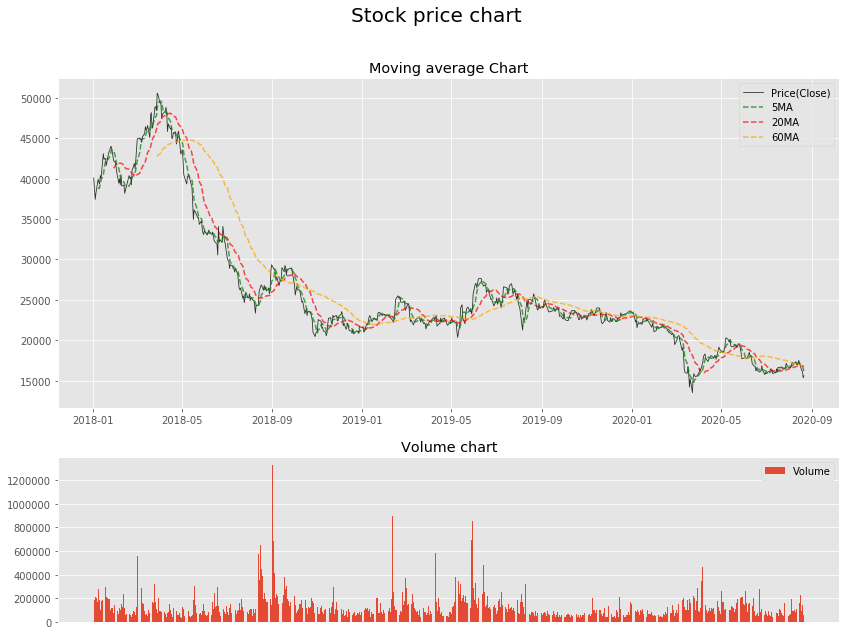

In [21]:
# 시험하기
plot_stock(stock)

## 3. 이동평균을 활용한 매수/매도 시점 찾기

- 1장에서 지표의 활용방법 중에 크로스오버(Crossovers)를 활용한 방법에 대하여 소개하였다.  
    - **크로스오버(Crossovers)** : 가격이 지표 추세선을 가로 지르거나 두개의 지표 추세선이 교차하는 지점을 매수/ 매도 신호로 추정하는 방법   
    
- 이동평균선을 활용한 매매 방법은 사용 이평선의 갯수에 따라 3가지로 분류된다.[[내용 및 그림 출처]](https://towardsdatascience.com/trading-toolbox-01-sma-7b8e16bd9388)  
    - Simple moving average method : 이동평균선 1개 사용  
    - Double crossover method : 이동평균선 2개 사용  
    - Triple crossover method : 이동평균선 3개 사용

### 3.1 Simple moving average method
가격('Close')이 이동평균선을 가로질러 상승하면 매수를, 가격이 이동평균선을 가로질러 하락하면 매도를 하는 방법이다.

<img src = './src/2.1.jpg' width = 1000>

### 3.2 Double crossover method  
짧은 이동평균선이 긴 이동평균선을 가로질러 상승하면 매수를, 가로질러 하강하면 매도를 하는 방법이다.  
아래 그림과 같이 20일 이동평균과 50일 이동평균을 예로 들어보자.
20일 선이 50일 선을 가로질러 상승하면 매수, 반대로 가로질러 하강하면 매도를 하는 방법이다. 

<img src = './src/2.2.jpg' width = 500>

### 3.3 Triple crossover method  
- 모든 매수/ 매도 타이밍은 가장 긴 이동평균선이 나머지 두 이평선 아래에 있을 때 유효하다.  
    - 가장 짧은 이동평균선이 두번째로 짧은 이동평균선을 가로지며 상승할 때 매수  
    - 가장 짧은 이동평균선이 두번째로 짧은 이동평균선을 가로지며 하강할 때 매수  

<img src = './src/2.3.jpg' width = 1000>

## 4. 실제사례 살펴보기  
- 앞에서 소개한 `인바디`의 주가를 살펴본다.

데이터 읽어오기

In [22]:
stock = fdr.DataReader('041830', '2017-1-01', '2020-8-22')

함수선언

In [23]:
def calc_ma(df, numbers = 3, min_periods = None):
    windows = [5, 20, 60, 120]
    cols = ['5MA', '20MA', '60MA', '120MA']
    
    for i in range(0, numbers) :
        df[cols[i]] = df['Close'].rolling(window = windows[i], min_periods = min_periods).mean()
    
    return df

In [24]:
def plot_stock(df, plot_ma = True, num_of_MAs = 3, title = 'Stock price chart'):
    fig, axes = plt.subplots(nrows=2, ncols=1,
                            gridspec_kw={'height_ratios': [2, 1]},figsize=(14, 10))  
    
    axes[0].plot(df['Close'], 'k', alpha = 0.8, linewidth = 0.8, label = 'Price(Close)')
    
    if plot_ma:
        windows = [5, 20, 60, 120]
        cols = ['5MA', '20MA', '60MA', '120MA']
        colors = ['g', 'r', 'orange', 'm']
        for i in range(0, num_of_MAs):
            axes[0].plot(df[cols[i]], c = colors[i], linestyle='--', alpha = 0.7, label = cols[i])
    
    axes[0].legend()

    x = np.arange(len(df.index)) # 바차트를 위해서 x 축 추가
    axes[1].get_xaxis().set_visible(False)
    axes[1].bar(x, df['Volume'], label = 'Volume')
    axes[1].legend()

    fig.suptitle(title, size=20)
    plt.setp(axes[0], title='Moving average Chart')
    plt.setp(axes[1], title='Volume chart')

    plt.show()

이동평균 계산

In [25]:
stock = calc_ma(stock)

In [26]:
stock.head()

,Open,High,Low,Close,Volume,Change,5MA,20MA,60MA
Date,,,,,,,,,
2017-01-02,27200,27200,26300,26450,51148,-0.020370,NaN,NaN,NaN
2017-01-03,26400,26750,26050,26650,71395,0.007561,NaN,NaN,NaN
2017-01-04,26800,27400,26300,27300,139048,0.024390,NaN,NaN,NaN
2017-01-05,27300,27800,27000,27700,110531,0.014652,NaN,NaN,NaN
2017-01-06,27650,27950,27150,27200,65272,-0.018051,27060.0,NaN,NaN


전체 데이터 시각화

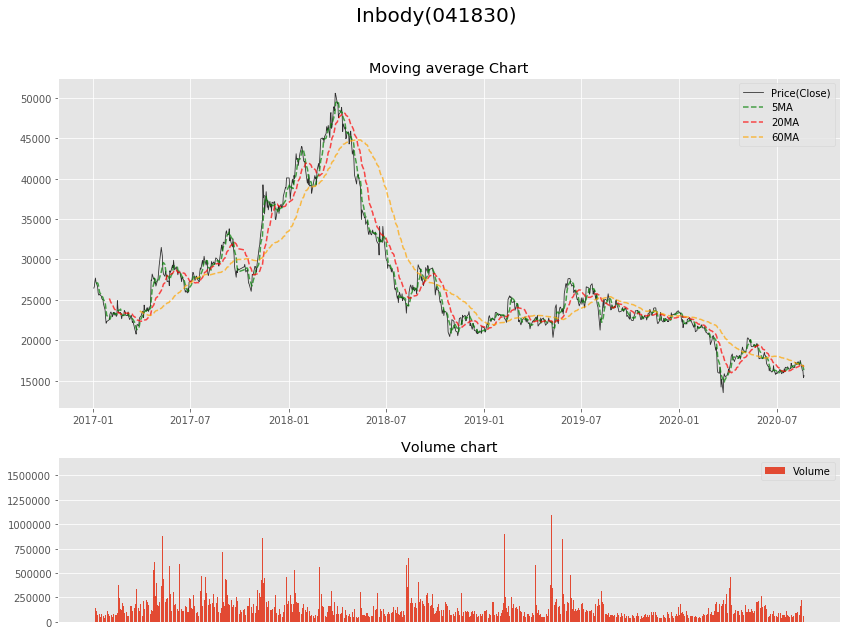

In [27]:
plot_stock(stock, plot_ma = True, num_of_MAs = 3, title = 'Inbody(041830)')

일부 구간 시각화 : 2017. 11 ~ 2018. 6

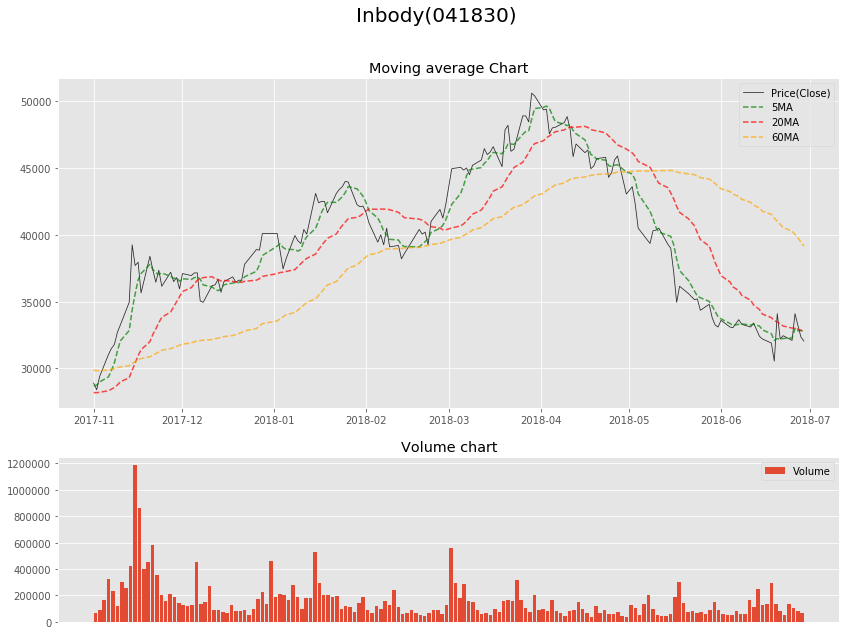

In [28]:
plot_stock(stock['2017-11':'2018-06'], plot_ma = True, num_of_MAs = 3, title = 'Inbody(041830)')

매수/ 매도시점 표시하기

In [29]:
import datetime as dt
import matplotlib.dates as mdates

In [30]:
buy = dt.datetime(2017, 12, 18)
sell = dt.datetime(2018, 4, 12)
stock_ranged = stock['2017-11':'2018-06']

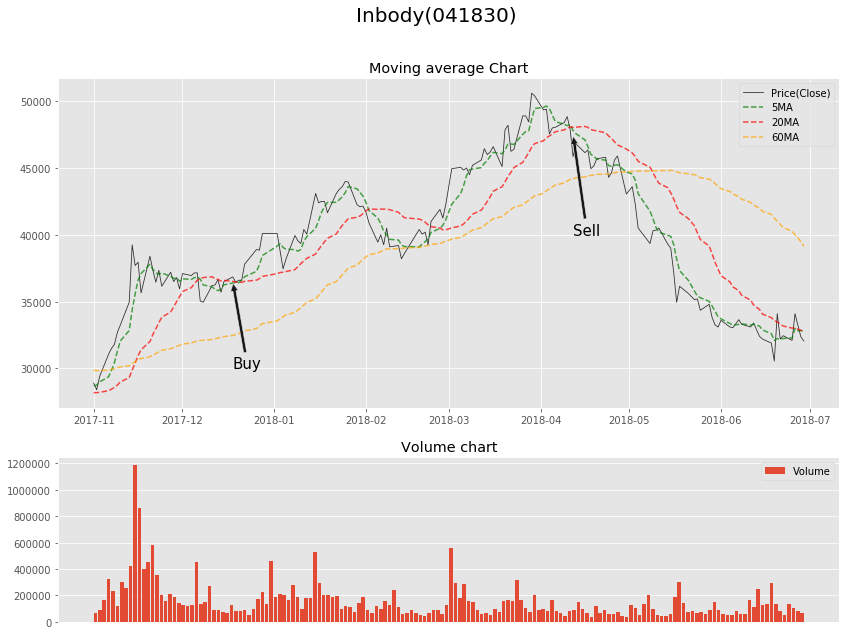

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=1,
                        gridspec_kw={'height_ratios': [2, 1]},figsize=(14, 10))  
axes[0].plot(stock_ranged['Close'], 'k', alpha = 0.8, linewidth = 0.8, label = 'Price(Close)')
axes[0].plot(stock_ranged['5MA'], 'g--', alpha = 0.7, label = '5MA')
axes[0].plot(stock_ranged['20MA'], 'r--', alpha = 0.7, label = '20MA')
axes[0].plot(stock_ranged['60MA'], color = 'orange', linestyle = '--', alpha = 0.7, label = '60MA')

axes[0].annotate('Buy', xy = (mdates.date2num(buy), 36500), xytext = (mdates.date2num(buy), 30000),fontsize=15,
                 xycoords='data', textcoords='data',
                arrowprops=dict(facecolor='black', arrowstyle="simple", alpha = 0.9))
axes[0].annotate('Sell', xy = (mdates.date2num(sell), 47500), xytext = (mdates.date2num(sell), 40000),fontsize=15,
                 xycoords='data', textcoords='data',
                arrowprops=dict(facecolor='black', arrowstyle="simple", alpha = 0.9))
# 참고 : https://matplotlib.org/3.3.1/tutorials/text/annotations.html
axes[0].legend()

x = np.arange(len(stock_ranged.index)) # 바차트를 위해서 x 축 추가
axes[1].get_xaxis().set_visible(False)
axes[1].bar(x, stock_ranged['Volume'], label = 'Volume')
axes[1].legend()

fig.suptitle('Inbody(041830)', size=20)
plt.setp(axes[0], title='Moving average Chart')
plt.setp(axes[1], title='Volume chart')

plt.show()

## 5. 향후계획  
- 매수/ 매도 시점을 자동으로 찾아내는 함수개발  
- 매수/ 매도구간 플로팅 함수 개발  
- 다음 장에서는 Bollinger band와 Moving average envalope에 대하여 살펴본다.